# Agentic Search Tools

Based on [**this tutorial**](https://learn.deeplearning.ai/courses/ai-agents-in-langgraph/lesson/4/agentic-search-tools)

# Setup

In [1]:
from dotenv import load_dotenv

In [2]:
_ = load_dotenv()

# Imports

In [3]:
import os

from tavily import TavilyClient

# Quick Search

In [4]:
client = TavilyClient(api_key=os.getenv("TAVILY_API_KEY"))

In [7]:
# Quick search to try
result = client.search("What is in NVIDIA's new Blackwell GPU?",
                       include_answer = True)  # Otherwise, you've no answer 😅

result

{'query': "What is in NVIDIA's new Blackwell GPU?",
 'follow_up_questions': None,
 'answer': "The new NVIDIA Blackwell GPU, specifically the Blackwell B200, features the Blackwell architecture with 208 billion transistors, making it the company's most powerful single-chip GPU designed for AI applications. NVIDIA claims that the Blackwell B200 can reduce AI inference operating costs and energy consumption by up to 25 times compared to its predecessor, the H100. This new GPU boasts a Decompression Engine and the ability to access massive amounts of memory in the NVIDIA Grace™ CPU at a high-speed link of 900 gigabytes per second (GB/s) of bidirectional bandwidth. The Blackwell platform is expected to be adopted by major organizations such as Amazon Web Services, Dell Technologies, Google, Meta, Microsoft, OpenAI, Oracle, Tesla, and xAI.",
 'images': None,
 'results': [{'title': 'Blackwell Architecture for Generative AI | NVIDIA',
   'url': 'https://www.nvidia.com/en-us/data-center/technol

In [8]:
# Display answer
result["answer"]

"The new NVIDIA Blackwell GPU, specifically the Blackwell B200, features the Blackwell architecture with 208 billion transistors, making it the company's most powerful single-chip GPU designed for AI applications. NVIDIA claims that the Blackwell B200 can reduce AI inference operating costs and energy consumption by up to 25 times compared to its predecessor, the H100. This new GPU boasts a Decompression Engine and the ability to access massive amounts of memory in the NVIDIA Grace™ CPU at a high-speed link of 900 gigabytes per second (GB/s) of bidirectional bandwidth. The Blackwell platform is expected to be adopted by major organizations such as Amazon Web Services, Dell Technologies, Google, Meta, Microsoft, OpenAI, Oracle, Tesla, and xAI."

# Regular Search

In [9]:
city = "Valenciennes"

query = f"""
    What is the current weather in {city}?
    Should I travel here today?
    "weather.com"
"""

> **NOTE**:
>
>  search was modified to return expected results in the event of an exception. High volumes of student traffic sometimes cause rate limit exceptions.

In [22]:
import re
from typing import List

from bs4 import BeautifulSoup
from duckduckgo_search import DDGS
import requests

In [11]:
ddg = DDGS()  # Class designed to interact with DuckDuckGo Search Engine

In [12]:
ddg

In [14]:
sample_search = ddg.text("What's the meaning of life?", max_results=3)

In [21]:
print(type(sample_search), len(sample_search), type(sample_search[0]))
for item in sample_search[0].items():
    print(item)

<class 'list'> 3 <class 'dict'>
('title', 'The Meaning of Life - Stanford Encyclopedia of Philosophy')
('href', 'https://plato.stanford.edu/entries/life-meaning/')
('body', "3. Naturalism. Recall that naturalism is the view that a physical life is central to life's meaning, that even if there is no spiritual realm, a substantially meaningful life is possible. Like supernaturalism, contemporary naturalism admits of two distinguishable variants, moderate and extreme (Metz 2019).")


In [26]:
def search(query: str, max_results: int = 6) -> List[str]:
    """
    Taking a query, returns a list of relevant URLs
    """
    try:
        results = ddg.text(query, max_results = max_results)
        return [result["href"] for result in results]
    except Exception as e:
        # Fallback
        print(f"returning previous results due to exception reaching ddg.")
        results = [ # cover case where DDG rate limits due to high deeplearning.ai volume
            "https://weather.com/weather/today/l/USCA0987:1:FR",
            "https://weather.com/weather/hourbyhour/l/54f9d8baac32496f6b5497b4bf7a277c3e2e6cc5625de69680e6169e7e38e9a8",
        ]
        return results          
    

In [28]:
help(search)

Help on function search in module __main__:

search(query: str, max_results: int = 6) -> List[str]
    Based on a query, returns a list of relevant URLs



In [27]:
for url in search(query):
    print(url)

https://weather.com/
https://weather.com/maps/currentusweather
https://weather.com/weather/hourbyhour/l/056df2d5488f0320be1c02b7bdfd74b12deab2451db66f8cbc2458ed4f2e91ea
https://weather.com/weather/hourbyhour/l/Coventry+RI?canonicalCityId=16932be20fb68dbe157feb30038c906f4275ca0eb40832ccb1079cd1900021ea
https://weather.com/weather/today/l/Chesapeake+VA?canonicalCityId=68f58f52a5f24e253af25dbefa6e32e4679a5391f27bf15a7530aa794e1c686d
https://weather.com/weather/tenday/l/Lancaster+PA?canonicalCityId=b2aa846244b5f3394b4d9800f4600f71bf38852049a7efce0ebeff928a3a5fc5


In [32]:
def scrape_weather_info(url: str) -> BeautifulSoup:
    if not url:
        return "Weather information couldn't be found."
    
    # Fetch data
    headers = {"User-Agent": "Mozilla/5.0"}
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve Web page"
    
    # Parse result
    soup = BeautifulSoup(response.text, "html.parser")
    return soup

In [33]:
# Use DuckDuckGo to find websites and take the first result
url = search(query)[0]

# Scrape first Web site
soup = scrape_weather_info(url)

print(f"Website: {url}\n\n")
print(str(soup.body)[:50000]) # limit long outputs

Website: https://weather.com/


<body><div class="appWrapper DaybreakLargeScreen LargeScreen lightTheme twcTheme DaybreakLargeScreen--appWrapper--3kKUE gradients--sunnyDay--38Z_l gradients--sunnyDay-top--2_nZW" id="appWrapper"><div class="region-meta"><div class="removeIfEmpty" id="WxuHtmlHead-meta-"></div><div class="removeIfEmpty" id="WxuNewsroom-meta-bc9f40d5-d941-4fd8-bae2-2d8d63a38bb3"></div></div><div class="region-topAds regionTopAds DaybreakLargeScreen--regionTopAds--2kcLJ"><div class="removeIfEmpty" id="WxuAd-topAds-53dce052-5465-4609-a555-c3a20ab64ab0"><div class="adWrapper BaseAd--adWrapper--1dWzA BaseAd--card--2G19u BaseAd--hide--3LkRr"><div class="adLabel BaseAd--adLabel--1LMu9">Advertisement</div><div class="ad_module BaseAd--ad_module--DeGCt subs-undefined BaseAd--placeholder--3IQan" id="WX_Hidden"></div></div></div><div class="removeIfEmpty" id="WxuAd-topAds-fe926b10-58bc-448a-ab09-47e692334250"><div class="adWrapper BaseAd--adWrapper--1dWzA BaseAd--card--2G19u BaseAd--

In [34]:
# extract text
weather_data = []
for tag in soup.find_all(['h1', 'h2', 'h3', 'p']):
    text = tag.get_text(" ", strip=True)
    weather_data.append(text)

# combine all elements into a single string
weather_data = "\n".join(weather_data)

# remove all spaces from the combined text
weather_data = re.sub(r'\s+', ' ', weather_data)
    
print(f"Website: {url}\n\n")
print(weather_data)

Website: https://weather.com/


recents Prévisions spécialisées Quartier des Halles Prévisions du jour pour Quartier des Halles Matin Après-midi Soir Nuit Météo aujourd'hui à Quartier des Halles 5:48 21:51 Prévisions heure par heure Mnt 10:00 11:00 12:00 13:00 Prévisions quotidiennes Aujourd'hui sam. 08 dim. 09 lun. 10 mar. 11 Radar INDICE DE LA QUALITÉ DE L'AIR Réduisez ou reportez les intenses activités physiques et sportives jusqu'à la fin de l’épisode et, si vous présentez les symptômes (fatigue inhabituelle, mal de gorge, nez bouché, toux, essoufflement, respiration sifflante, palpitations), demandez conseil à votre médecin ou votre pharmacien. Santé & Activités Prévisions d'allergies saisonnières et de taux de pollen No pollen detected in your area Nous reconnaissons notre responsabilité quant à l'utilisation des données et de la technologie. Nous pouvons utiliser ou partager vos données avec nos fournisseurs de données. Prenez le contrôle de vos données. © The Weather Company, L

# Agentic Search

In [35]:
# Run search
result = client.search(query, max_results=1)

In [36]:
result

{'query': '\n    What is the current weather in Valenciennes?\n    Should I travel here today?\n    "weather.com"\n',
 'follow_up_questions': None,
 'answer': None,
 'images': None,
 'results': [{'title': 'Weather in Valenciennes',
   'url': 'https://www.weatherapi.com/',
   'content': "{'location': {'name': 'Valenciennes', 'region': 'Nord-Pas-de-Calais', 'country': 'France', 'lat': 50.35, 'lon': 3.53, 'tz_id': 'Europe/Paris', 'localtime_epoch': 1717747927, 'localtime': '2024-06-07 10:12'}, 'current': {'last_updated_epoch': 1717747200, 'last_updated': '2024-06-07 10:00', 'temp_c': 14.0, 'temp_f': 57.2, 'is_day': 1, 'condition': {'text': 'Partly cloudy', 'icon': '//cdn.weatherapi.com/weather/64x64/day/116.png', 'code': 1003}, 'wind_mph': 5.6, 'wind_kph': 9.0, 'wind_degree': 230, 'wind_dir': 'SW', 'pressure_mb': 1020.0, 'pressure_in': 30.12, 'precip_mm': 0.01, 'precip_in': 0.0, 'humidity': 72, 'cloud': 75, 'feelslike_c': 13.1, 'feelslike_f': 55.6, 'windchill_c': 15.8, 'windchill_f': 60.4

In [38]:
data = result["results"][0]["content"]
print(data)

{'location': {'name': 'Valenciennes', 'region': 'Nord-Pas-de-Calais', 'country': 'France', 'lat': 50.35, 'lon': 3.53, 'tz_id': 'Europe/Paris', 'localtime_epoch': 1717747927, 'localtime': '2024-06-07 10:12'}, 'current': {'last_updated_epoch': 1717747200, 'last_updated': '2024-06-07 10:00', 'temp_c': 14.0, 'temp_f': 57.2, 'is_day': 1, 'condition': {'text': 'Partly cloudy', 'icon': '//cdn.weatherapi.com/weather/64x64/day/116.png', 'code': 1003}, 'wind_mph': 5.6, 'wind_kph': 9.0, 'wind_degree': 230, 'wind_dir': 'SW', 'pressure_mb': 1020.0, 'pressure_in': 30.12, 'precip_mm': 0.01, 'precip_in': 0.0, 'humidity': 72, 'cloud': 75, 'feelslike_c': 13.1, 'feelslike_f': 55.6, 'windchill_c': 15.8, 'windchill_f': 60.4, 'heatindex_c': 15.8, 'heatindex_f': 60.4, 'dewpoint_c': 10.4, 'dewpoint_f': 50.8, 'vis_km': 10.0, 'vis_miles': 6.0, 'uv': 4.0, 'gust_mph': 8.7, 'gust_kph': 14.1}}


> **NOTE**
> 
> The output is quite ugly (and more ugly within VSCode in fact...). Hence, we will pretty print using the [**pygments**](https://pygments.org/docs/) library.

In [41]:
import json

from pygments import formatters, highlight, lexers

In [42]:
# Parse JSON
parsed_json = json.loads(data.replace("'", '"'))

# Pretty print JSON with syntax highlighting
formatted_json = json.dumps(parsed_json, indent=4)
colorful_json = highlight(formatted_json,
                          lexers.JsonLexer(),
                          formatters.TerminalFormatter())
print(colorful_json)

{
    "location": {
        "name": "Valenciennes",
        "region": "Nord-Pas-de-Calais",
        "country": "France",
        "lat": 50.35,
        "lon": 3.53,
        "tz_id": "Europe/Paris",
        "localtime_epoch": 1717747927,
        "localtime": "2024-06-07 10:12"
    },
    "current": {
        "last_updated_epoch": 1717747200,
        "last_updated": "2024-06-07 10:00",
        "temp_c": 14.0,
        "temp_f": 57.2,
        "is_day": 1,
        "condition": {
            "text": "Partly cloudy",
            "icon": "//cdn.weatherapi.com/weather/64x64/day/116.png",
            "code": 1003
        },
        "wind_mph": 5.6,
        "wind_kph": 9.0,
        "wind_degree": 230,
        "wind_dir": "SW",
        "pressure_mb": 1020.0,
        "pressure_in": 30.12,
        "precip_mm": 0.01,
        "precip_in": 0.0,
        "humidity": 72,
        "cloud": 75,
        "feelslike_c": 13.1,
        "feelslike_f": 55.6,
        "windchill_c": 15.8,
        "windchill_f": 60.4,


> **NOTE**
> 
> I wonder if the same result couldn't have been reached in a simpler way using [**rich**](https://pypi.org/project/rich/) (maybe only in Terminal though...)

The previous output is **ideal for an agent**.

Note that it conflicts with what's an **ideal output for a human**, illustrated below...
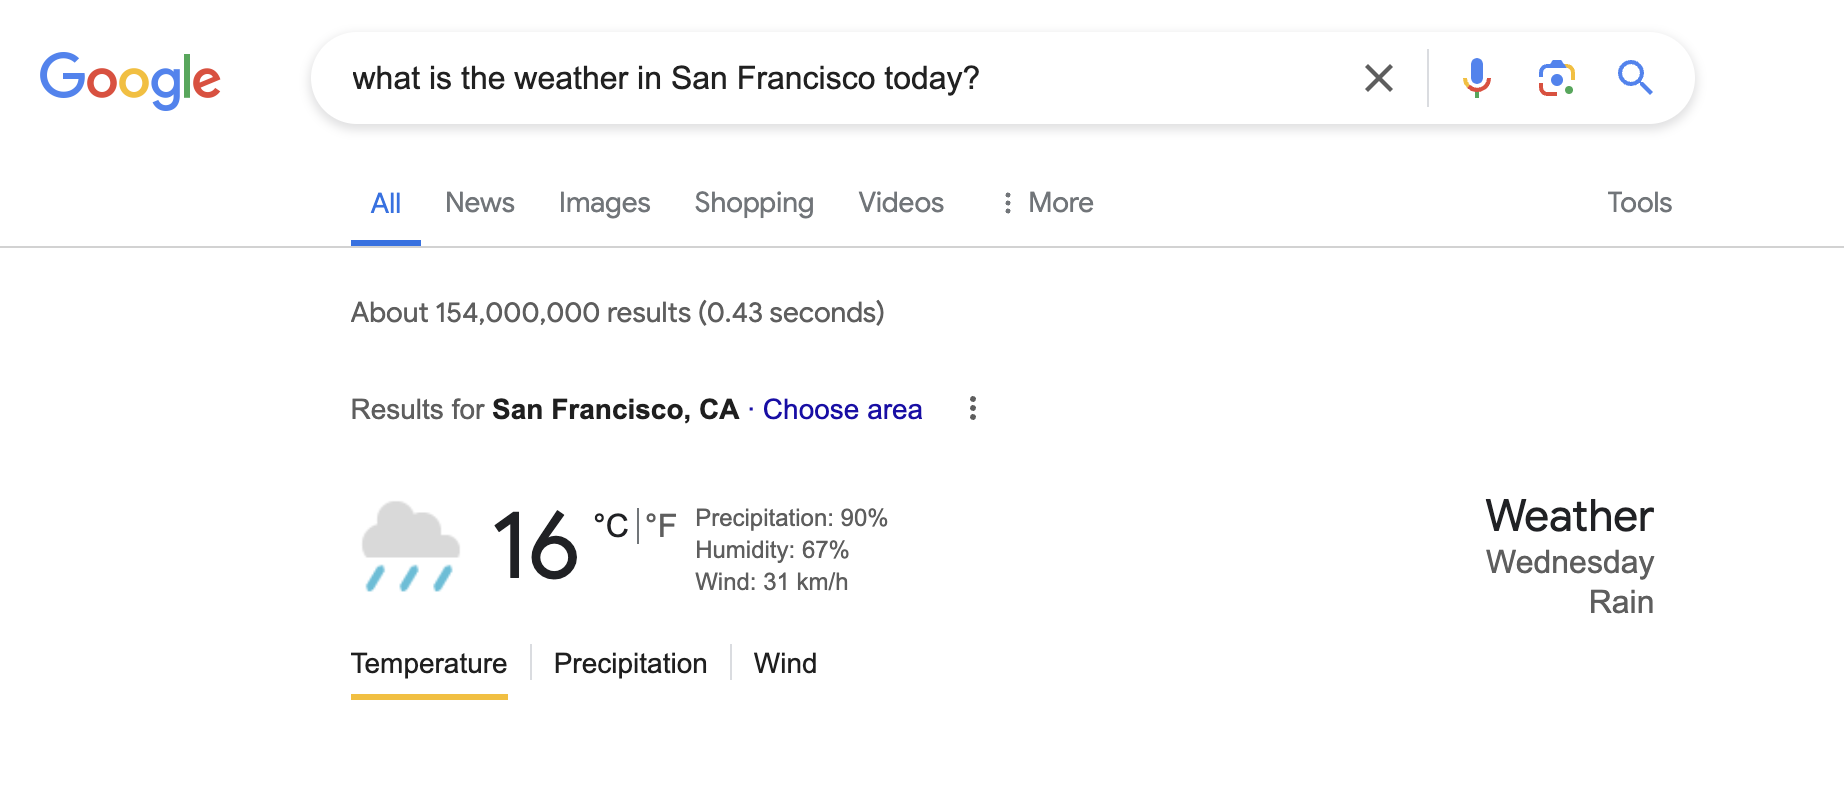